In [ ]:
from sklearn import tree # tree library
%matplotlib inline
from sklearn.tree import export_graphviz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("/content/Titanic.csv")  # Loads datasets as a dataframe using pandas, read_csv
data.head() # Shows first 5 entries


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
# drop everything but pclass + sex + age + sibsp and survived
data.drop(['parch','embarked', 'boat', 'body','home.dest','name','ticket','cabin', 'fare', 'Unnamed: 0'], axis='columns', inplace=True)
data = data.dropna(how='any',axis=0)  #delete any row with missing data
display(data)

,pclass,survived,sex,age,sibsp
0,1st,1,female,29.0000,0
1,1st,1,male,0.9167,1
2,1st,0,female,2.0000,1
3,1st,0,male,30.0000,1
4,1st,0,female,25.0000,1
...,...,...,...,...,...
1301,3rd,0,male,45.5000,0
1304,3rd,0,female,14.5000,1
1306,3rd,0,male,26.5000,0
1307,3rd,0,male,27.0000,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

data['pclass'] = enc.fit_transform(data['pclass'])
data['sex'] = enc.fit_transform(data['sex'])

# Seperate label from features
inputs = data.drop('survived', axis='columns')  #feature columns
target= data.survived   #Survived column

inputs.head()

,pclass,sex,age,sibsp
0,0,0,29.0000,0
1,0,1,0.9167,1
2,0,0,2.0000,1
3,0,1,30.0000,1
4,0,0,25.0000,1


In [ ]:
from sklearn.model_selection import train_test_split
# split training and testing data 80/20 randomly
x_train, x_test, y_train, y_test = train_test_split(inputs,target, test_size=.2)

#normalizing data, scales from -1/+1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
#step 2 fit mulitlayer perceptron with training data
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='sgd', hidden_layer_sizes=(10,20), activation='logistic', alpha=10e-5, learning_rate_init=.08, verbose=10, momentum=0.9, max_iter=200, random_state=1,)
mlp.fit(x_train, y_train)

print('Number of Layers: ', mlp.n_layers_)  #1 input layer, 2 hidden layers, and 1 output layer

Iteration 1, loss = 0.72318172
Iteration 2, loss = 0.68083928
Iteration 3, loss = 0.67997342
Iteration 4, loss = 0.67924149
Iteration 5, loss = 0.68029375
Iteration 6, loss = 0.67782029
Iteration 7, loss = 0.67578589
Iteration 8, loss = 0.67329088
Iteration 9, loss = 0.67223093
Iteration 10, loss = 0.67260998
Iteration 11, loss = 0.67103830
Iteration 12, loss = 0.66687040
Iteration 13, loss = 0.66352434
Iteration 14, loss = 0.66892630
Iteration 15, loss = 0.65871230
Iteration 16, loss = 0.65185083
Iteration 17, loss = 0.64587751
Iteration 18, loss = 0.63966142
Iteration 19, loss = 0.62892001
Iteration 20, loss = 0.62128029
Iteration 21, loss = 0.60929036
Iteration 22, loss = 0.59254931
Iteration 23, loss = 0.57703851
Iteration 24, loss = 0.56203774
Iteration 25, loss = 0.54678239
Iteration 26, loss = 0.52816984
Iteration 27, loss = 0.51640094
Iteration 28, loss = 0.50484709
Iteration 29, loss = 0.49989862
Iteration 30, loss = 0.49177044
Iteration 31, loss = 0.48882429
Iteration 32, los

In [ ]:
# Step 3 check the performance of the model: in-sample and out-of-sample accuracy
from sklearn.metrics import confusion_matrix

#In sample (using training data)
y_pred = mlp.predict(x_train) #predicitions from training set
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel() # gives true negative, false positive, false negative, and true positive
print('In Sample')
print(' ')
print('True Positives Rate: ', tp/(tp + fn))
print('True Negatives Rate: ', tn/(tn + fp))
in_sample1 = mlp.score(x_train, y_train) #used for comparing in sample accuracies with HW 3
print('Accuracy: ', in_sample1)    # accuracy with training set
print(' ')
#Out of sample (using testing data)
y_pred2 = mlp.predict(x_test) #predicitions from testing set
tn2, fp2, fn2, tp2 =confusion_matrix(y_test, y_pred2).ravel() # gives true negative, false positive, false negative, and true positive
print('Out of Sample')
print(' ')
print('True Positives Rate: ', tp2/(tp2 + fn2))
print('True Negatives Rate: ', tn2/(tn2 + fp2))
out_sample1 = mlp.score(x_test, y_test)  #used for comparing out of sample accuracies with HW 3
print('Accuracy: ', out_sample1)    # accuracy with test set


In Sample
 
True Positives Rate:  0.6522988505747126
True Negatives Rate:  0.8811475409836066
Accuracy:  0.7858851674641149
 
Out of Sample
 
True Positives Rate:  0.7341772151898734
True Negatives Rate:  0.8931297709923665
Accuracy:  0.8333333333333334


In [ ]:
#Testing first alternative network structures

#30 nodes at first hidden layer, 20 nodes at the second hidden layer
mlp = MLPClassifier(solver='sgd', hidden_layer_sizes=(30,20), activation='logistic', alpha=1e-5, learning_rate_init=.1, verbose=10, momentum=0.9, max_iter=100, random_state=1,)
mlp.fit(x_train, y_train)

#In sample (using training data)
y_pred = mlp.predict(x_train) #predicitions from training set
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel() # gives true negative, false positive, false negative, and true positive
print('In Sample')
print(' ')
print('True Positives Rate: ', tp/(tp + fn))
print('True Negatives Rate: ', tn/(tn + fp))
in_sample2 = mlp.score(x_train, y_train) #used for comparing in sample accuracies with HW 3
print('Accuracy: ', mlp.score(x_train, y_train))    # accuracy with training set
print(' ')
#Out of sample (using testing data)
y_pred2 = mlp.predict(x_test) #predicitions from testing set
tn2, fp2, fn2, tp2 =confusion_matrix(y_test, y_pred2).ravel() # gives true negative, false positive, false negative, and true positive
print('Out of Sample')
print(' ')
print('True Positives Rate: ', tp2/(tp2 + fn2))
print('True Negatives Rate: ', tn2/(tn2 + fp2))
out_sample2 = mlp.score(x_train, y_train) #used for comparing in sample accuracies with HW 3
print('Accuracy: ', mlp.score(x_test, y_test))    # accuracy with test set

Iteration 1, loss = 0.69144128
Iteration 2, loss = 0.69838644
Iteration 3, loss = 0.67787997
Iteration 4, loss = 0.67842627
Iteration 5, loss = 0.67644752
Iteration 6, loss = 0.67515922
Iteration 7, loss = 0.67716323
Iteration 8, loss = 0.67236855
Iteration 9, loss = 0.67068417
Iteration 10, loss = 0.66965345
Iteration 11, loss = 0.66662615
Iteration 12, loss = 0.66240609
Iteration 13, loss = 0.65876384
Iteration 14, loss = 0.65331460
Iteration 15, loss = 0.64712136
Iteration 16, loss = 0.63850113
Iteration 17, loss = 0.62840849
Iteration 18, loss = 0.61639861
Iteration 19, loss = 0.60212748
Iteration 20, loss = 0.58164106
Iteration 21, loss = 0.55644939
Iteration 22, loss = 0.53457361
Iteration 23, loss = 0.51669555
Iteration 24, loss = 0.50356970
Iteration 25, loss = 0.49423248
Iteration 26, loss = 0.48952852
Iteration 27, loss = 0.48600657
Iteration 28, loss = 0.48278358
Iteration 29, loss = 0.48146506
Iteration 30, loss = 0.48068423
Iteration 31, loss = 0.47862345
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#Testing second alternative network structures

#100 nodes at first hidden layer, 80 nodes at the second hidden layer
mlp = MLPClassifier(solver='sgd', hidden_layer_sizes=(100,80), activation='logistic', alpha=1e-5, learning_rate_init=.1, verbose=10, momentum=0.9, max_iter=100, random_state=1,)
mlp.fit(x_train, y_train)

#In sample (using training data)
y_pred = mlp.predict(x_train) #predicitions from training set
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel() # gives true negative, false positive, false negative, and true positive
print('In Sample')
print(' ')
print('True Positives Rate: ', tp/(tp + fn))
print('True Negatives Rate: ', tn/(tn + fp))
in_sample3 = mlp.score(x_train, y_train) #used for comparing in sample accuracies with HW 3
print('Accuracy: ', mlp.score(x_train, y_train))    # accuracy with training set
print(' ')
#Out of sample (using testing data)
y_pred2 = mlp.predict(x_test) #predicitions from testing set
tn2, fp2, fn2, tp2 =confusion_matrix(y_test, y_pred2).ravel() # gives true negative, false positive, false negative, and true positive
print('Out of Sample')
print(' ')
print('True Positives Rate: ', tp2/(tp2 + fn2))
print('True Negatives Rate: ', tn2/(tn2 + fp2))
out_sample3 = mlp.score(x_train, y_train) #used for comparing in sample accuracies with HW 3
print('Accuracy: ', mlp.score(x_test, y_test))    # accuracy with test set

Iteration 1, loss = 0.69657641
Iteration 2, loss = 0.68143181
Iteration 3, loss = 0.68259464
Iteration 4, loss = 0.68951193
Iteration 5, loss = 0.67796318
Iteration 6, loss = 0.67485109
Iteration 7, loss = 0.67786520
Iteration 8, loss = 0.66804482
Iteration 9, loss = 0.66623638
Iteration 10, loss = 0.69732419
Iteration 11, loss = 0.66498549
Iteration 12, loss = 0.65743619
Iteration 13, loss = 0.64484629
Iteration 14, loss = 0.63735486
Iteration 15, loss = 0.62360133
Iteration 16, loss = 0.62002448
Iteration 17, loss = 0.59146012
Iteration 18, loss = 0.56432719
Iteration 19, loss = 0.54190880
Iteration 20, loss = 0.52712617
Iteration 21, loss = 0.50495219
Iteration 22, loss = 0.48968309
Iteration 23, loss = 0.49396621
Iteration 24, loss = 0.48212984
Iteration 25, loss = 0.49040162
Iteration 26, loss = 0.48095226
Iteration 27, loss = 0.48404542
Iteration 28, loss = 0.50254248
Iteration 29, loss = 0.48046296
Iteration 30, loss = 0.47983655
Iteration 31, loss = 0.47689937
Iteration 32, los

In [ ]:
#Single hidden layer with 15 nodes and 'adam' solver and adjusted alpha for overfitting
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(15), activation='logistic', alpha=10e-5, learning_rate_init=.1, verbose=10, momentum=.9, max_iter=200, random_state=1,)
mlp.fit(x_train, y_train)

#In sample (using training data)
y_pred = mlp.predict(x_train) #predicitions from training set
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel() # gives true negative, false positive, false negative, and true positive
print('In Sample')
print(' ')
print('True Positives Rate: ', tp/(tp + fn))
print('True Negatives Rate: ', tn/(tn + fp))
in_sample4 = mlp.score(x_train, y_train) #used for comparing in sample accuracies with HW 3
print('Accuracy: ', mlp.score(x_train, y_train))    # accuracy with training set
print(' ')
#Out of sample (using testing data)
y_pred2 = mlp.predict(x_test) #predicitions from testing set
tn2, fp2, fn2, tp2 =confusion_matrix(y_test, y_pred2).ravel() # gives true negative, false positive, false negative, and true positive
print('Out of Sample')
print(' ')
print('True Positives Rate: ', tp2/(tp2 + fn2))
print('True Negatives Rate: ', tn2/(tn2 + fp2))
out_sample4 = mlp.score(x_train, y_train) #used for comparing in sample accuracies with HW 3
print('Accuracy: ', mlp.score(x_test, y_test))    # accuracy with test set

Iteration 1, loss = 0.65619553
Iteration 2, loss = 0.51270204
Iteration 3, loss = 0.48308239
Iteration 4, loss = 0.49160835
Iteration 5, loss = 0.48228295
Iteration 6, loss = 0.46910925
Iteration 7, loss = 0.46736917
Iteration 8, loss = 0.46330935
Iteration 9, loss = 0.45715167
Iteration 10, loss = 0.45683903
Iteration 11, loss = 0.45462036
Iteration 12, loss = 0.45439177
Iteration 13, loss = 0.45405768
Iteration 14, loss = 0.45081908
Iteration 15, loss = 0.44620824
Iteration 16, loss = 0.45543558
Iteration 17, loss = 0.45707338
Iteration 18, loss = 0.45515710
Iteration 19, loss = 0.44690026
Iteration 20, loss = 0.45645986
Iteration 21, loss = 0.44706091
Iteration 22, loss = 0.45432958
Iteration 23, loss = 0.44410038
Iteration 24, loss = 0.44308230
Iteration 25, loss = 0.44178736
Iteration 26, loss = 0.44504444
Iteration 27, loss = 0.44490648
Iteration 28, loss = 0.44022119
Iteration 29, loss = 0.43678565
Iteration 30, loss = 0.43575937
Iteration 31, loss = 0.43991606
Iteration 32, los

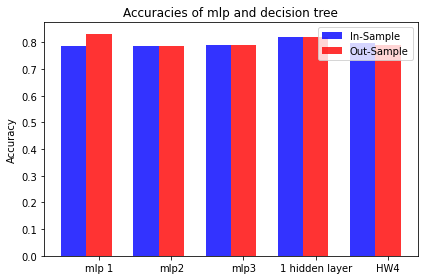

In [ ]:
#step 4
hw3_in_sample = 0.7984718242597899
hw3_out_sample = 0.7900763358778626 

in_samples = (in_sample1, in_sample2, in_sample3, in_sample4, hw3_in_sample)
out_samples = (out_sample1, out_sample2, out_sample3, out_sample4, hw3_out_sample)

n_groups = 5
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, in_samples, bar_width, alpha=opacity, color='b', label='In-Sample')
rects2 = plt.bar(index + bar_width, out_samples, bar_width, alpha=opacity, color='r', label='Out-Sample')

plt.ylabel('Accuracy')
plt.title('Accuracies of mlp and decision tree')
plt.xticks(index + bar_width, ('mlp 1', 'mlp2', 'mlp3','1 hidden layer', 'HW4'))
plt.legend()
plt.tight_layout()
plt.show()

#step 4

**Step 4:** The 2 hidden layer neural networks I tested for this assignment and the pruned decision tree have very similar accuracies, all at about 79-81%. My final pruned decision tree had slightly worse out-of sample accuracies than the neural networks, while the in-sample accuracies were almost the same. Comparing a few different 2 hidden layer network structures, the in-sample accuracy was the highest when the layers had 100 and 80 nodes respecitvely. The best out of sample accuracy was when the layers had 10 and 20 nodes respecitvely. The most accurate network structure that I tested had a single hidden layer with 15 nodes, which had in-sample and out of sample accuracies of about 82%.